In [27]:
from lightkurve import TessTargetPixelFile

In [28]:
tpf = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=83.2780304&dec=11.77941513&y=5&x=5&units=px&sector=All')

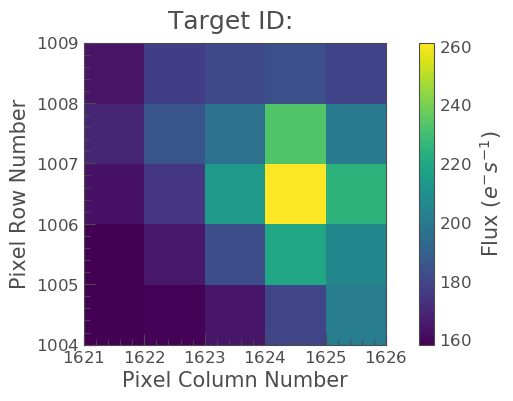

In [29]:
tpf.plot()

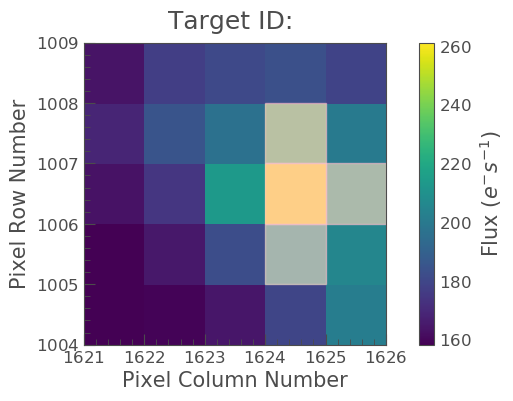

In [30]:
#This code is used to create a new aperture. Please note that this code is from Lightkurve Tutorials. 
import numpy as np
# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)
# Select pixels which are brighter than the 86th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 86)
# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [31]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)

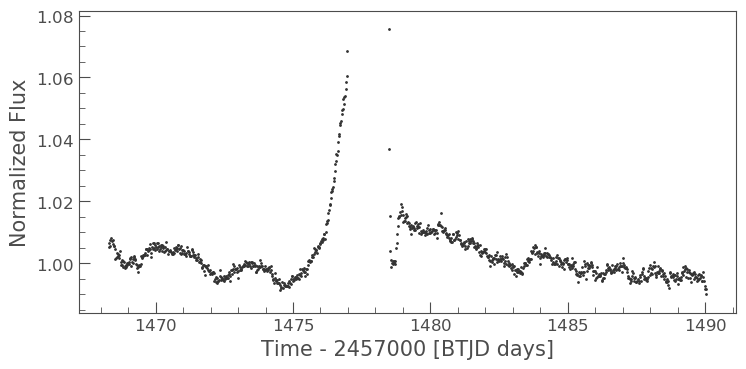

In [33]:
lc.remove_nans().remove_outliers(sigma=6).flatten(window_length=1477).scatter()

In [34]:
pg = lc.to_periodogram(oversample_factor=1)

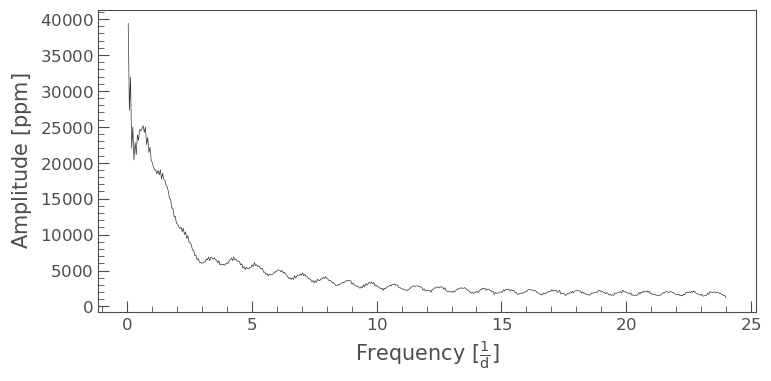

In [35]:
pg.plot()

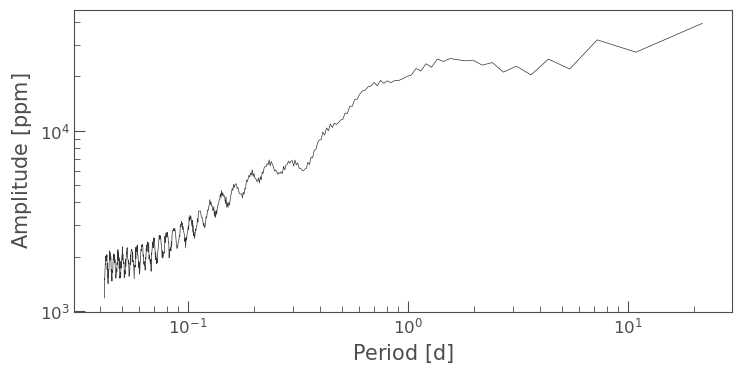

In [36]:
pg.plot(view='period', scale='log')

In [37]:
period=pg.period_at_max_power
print("Best Period: {}".format(period))

Best Period: 21.74969482421875 d


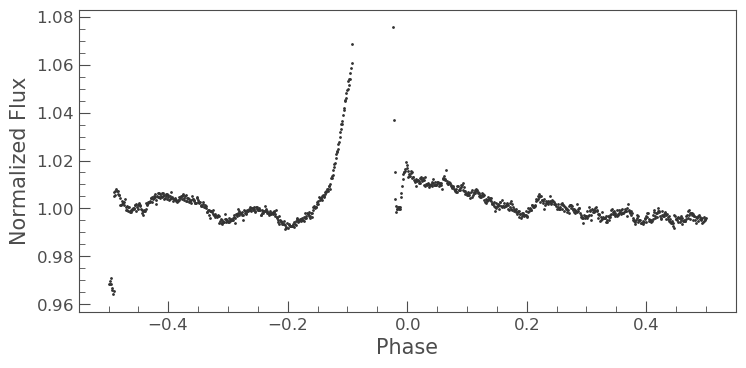

In [43]:
lc.remove_nans().remove_outliers(sigma=6).fold(period.value).flatten(window_length=1477).scatter()

In [25]:
tpf1 = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=83.2780304&dec=11.77941513&y=10&x=5&units=px&sector=All')

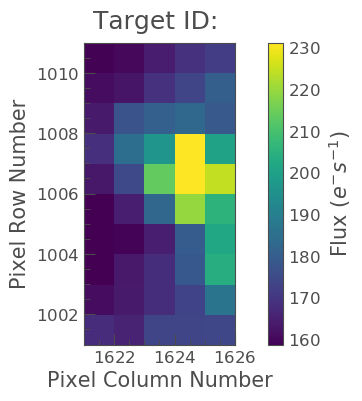

In [26]:
tpf1.plot()